In [1]:
import numpy as np
import trimesh
import pyrender
import matplotlib.pyplot as plt
r = pyrender.OffscreenRenderer(450, 450)
scene = pyrender.Scene()
import os
from math import cos, sin

def angle2Matrix(x, y, z):
    Rx = np.array([[1, 0, 0],
                   [0, cos(x), sin(x)],
                   [0, -sin(x), cos(x)]])
    Ry = np.array([[cos(y), 0, -sin(y)],
                   [0, 1, 0],
                   [sin(y), 0, cos(y)]])
    Rz = np.array([[cos(z), sin(z), 0],
                   [-sin(z), cos(z), 0],
                   [0, 0, 1]])
    # rotate
    R = Rx.dot(Ry).dot(Rz)
    R = R.astype(np.float32)
    # print(R)
    return R

In [2]:
path='data/back/MICC/subject_01/Model/frontal1/obj/110920150452.obj'
objmesh = trimesh.load(path)
objmesh.vertices=objmesh.vertices-objmesh.vertices.mean(axis=0)
mesh = pyrender.Mesh.from_trimesh(objmesh)
#camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)

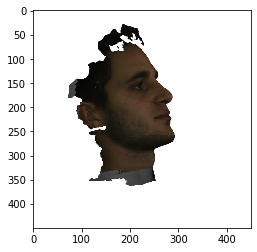

In [19]:
x=5
y=-60

pitch_angle = x / 180. * np.pi
yaw_angle = y / 180. * np.pi

R2=angle2Matrix(0,yaw_angle,0)
R1 = angle2Matrix(np.pi / 4+ pitch_angle,0, 0)
R=R2.dot(R1)
face_pose = np.zeros((4, 4))
face_pose[0:3, 0:3] = R
face_pose[3, 3] = 1
scene.add(mesh,pose=face_pose)

camera_pose=np.eye(4)
camera_pose[2,3]=(objmesh.vertices[:,1].max()-objmesh.vertices[:,1].min())/1.2
camera = pyrender.OrthographicCamera(xmag=camera_pose[2,3], ymag=camera_pose[2,3], zfar=1000)
scene.add(camera, pose=camera_pose)
light = pyrender.DirectionalLight(color=[1.0, 1.0, 1.0], intensity=5.0)
scene.add(light, pose=camera_pose)
color, depth = r.render(scene)
plt.imshow(color)
plt.show()
v = mesh.primitives[0].positions
scene.clear()

In [18]:
print(v.max(axis=0))
print(v.min(axis=0))
print(camera_pose[2,3])
a=color[:,:,0]
w=np.where(a<255)
print(w[0].max()-300,w[0].min()-300)
print(w[1].max()-300,w[1].min()-300)

[ 83.77719 157.41386 125.30197]
[-100.128204  -90.74242  -131.7873  ]
206.79690000000002
63 -272
-8 -228


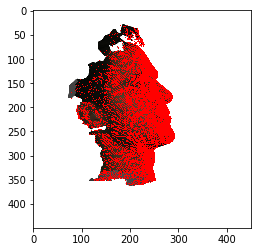

In [20]:
p=v.copy()
pt=p.dot(R.T)
s=color.copy()
red=np.array([255,0,0])
for i in range(len(pt)):
    ii=int(225-pt[i][1]*225/camera_pose[2,3])
    jj=int(pt[i][0]*225/camera_pose[2,3]+225)
    if ii<0:
        ii=0
    if jj<0:
        jj=0
    if ii>=450:
        ii=449
    if jj>=450:
        jj=449
    s[ii,jj]=red
plt.imshow(s)
plt.show()

In [57]:
v

[ 83.77719 157.41386 125.30197]
[-100.128204  -90.74242  -131.7873  ]
496.31256
76 -111
50 -61
